In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df=pd.read_csv("EV_WORLD.csv")
df=df.drop(['category','parameter','mode','unit'], axis=1)
df.head(25)
# Create separate datasets for PHEV and BEV
df = df[df['powertrain'] == 'BEV']
df=df.drop(['region','powertrain'],axis=1)
df
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['value']])
# Prepare the data for XGBoost
lookback = 3  # Number of previous time steps to consider
X, y = [], []
for i in range(len(df) - lookback):
    X.append(scaled_data[i:i+lookback])
    y.append(scaled_data[i+lookback])
X, y = np.array(X), np.array(y)

# Build the XGBoost model
model = XGBRegressor()
model.fit(X.reshape(X.shape[0], -1), y.ravel())

# Make predictions on the entire time series
y_pred = model.predict(X.reshape(X.shape[0], -1))
# Inverse scale the predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_actual_inv = scaler.inverse_transform(y.reshape(-1, 1))


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_actual_inv, y_pred_inv))
print('RMSE:', rmse)

Epoch 1/300
10/10 - 2s - loss: 0.1502 - 2s/epoch - 194ms/step
Epoch 2/300
10/10 - 0s - loss: 0.1363 - 28ms/epoch - 3ms/step
Epoch 3/300
10/10 - 0s - loss: 0.1257 - 35ms/epoch - 4ms/step
Epoch 4/300
10/10 - 0s - loss: 0.1153 - 29ms/epoch - 3ms/step
Epoch 5/300
10/10 - 0s - loss: 0.1073 - 31ms/epoch - 3ms/step
Epoch 6/300
10/10 - 0s - loss: 0.0985 - 31ms/epoch - 3ms/step
Epoch 7/300
10/10 - 0s - loss: 0.0910 - 31ms/epoch - 3ms/step
Epoch 8/300
10/10 - 0s - loss: 0.0840 - 32ms/epoch - 3ms/step
Epoch 9/300
10/10 - 0s - loss: 0.0782 - 32ms/epoch - 3ms/step
Epoch 10/300
10/10 - 0s - loss: 0.0737 - 32ms/epoch - 3ms/step
Epoch 11/300
10/10 - 0s - loss: 0.0712 - 32ms/epoch - 3ms/step
Epoch 12/300
10/10 - 0s - loss: 0.0682 - 30ms/epoch - 3ms/step
Epoch 13/300
10/10 - 0s - loss: 0.0656 - 31ms/epoch - 3ms/step
Epoch 14/300
10/10 - 0s - loss: 0.0621 - 31ms/epoch - 3ms/step
Epoch 15/300
10/10 - 0s - loss: 0.0597 - 30ms/epoch - 3ms/step
Epoch 16/300
10/10 - 0s - loss: 0.0578 - 59ms/epoch - 6ms/step
E

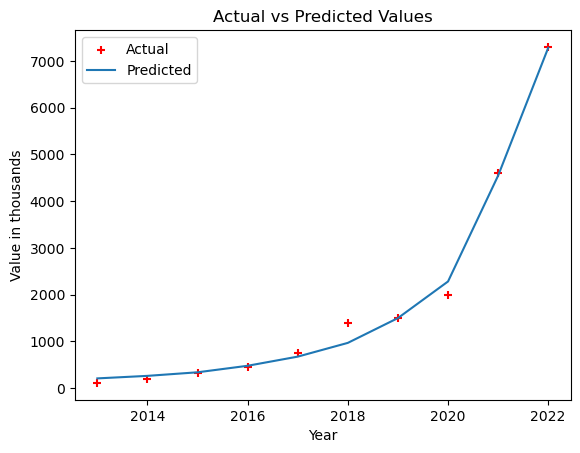

RMSE: 170551.81605334746


In [1]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['value']])

# Prepare the data for LSTM
lookback = 3  # Number of previous time steps to consider
X, y = [], []
for i in range(len(df) - lookback):
    X.append(scaled_data[i:i+lookback])
    y.append(scaled_data[i+lookback])
X, y = np.array(X), np.array(y)

# Build the LSTM model with regularization and dropout
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(lookback, 1), kernel_regularizer=l2(0.001)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model with early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X, y, epochs=250, batch_size=1, verbose=2, callbacks=[early_stopping])

# Make predictions on the entire time series
y_pred = model.predict(X)
# Inverse scale the predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_actual_inv = scaler.inverse_transform(y)


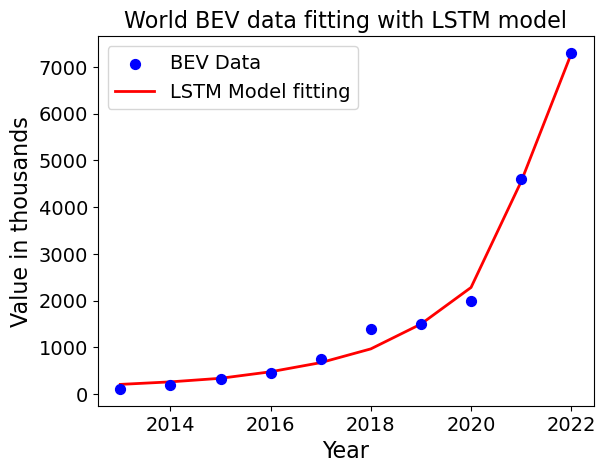

RMSE: 170551.81605334746


In [8]:
# Plot the actual and predicted values
plt.scatter(df['year'][lookback:], y_actual_inv/1000,color='blue',marker='o', s=50, zorder=10,label='BEV Data')
plt.plot(df['year'][lookback:], y_pred_inv/1000,color='red',linewidth=2, label='LSTM Model fitting')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Value in thousands', fontsize=16)
plt.title('World BEV data fitting with LSTM model', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_actual_inv, y_pred_inv))
print('RMSE:', rmse)

c:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\risha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed t

1/1 [==============================] - 0s 300ms/step


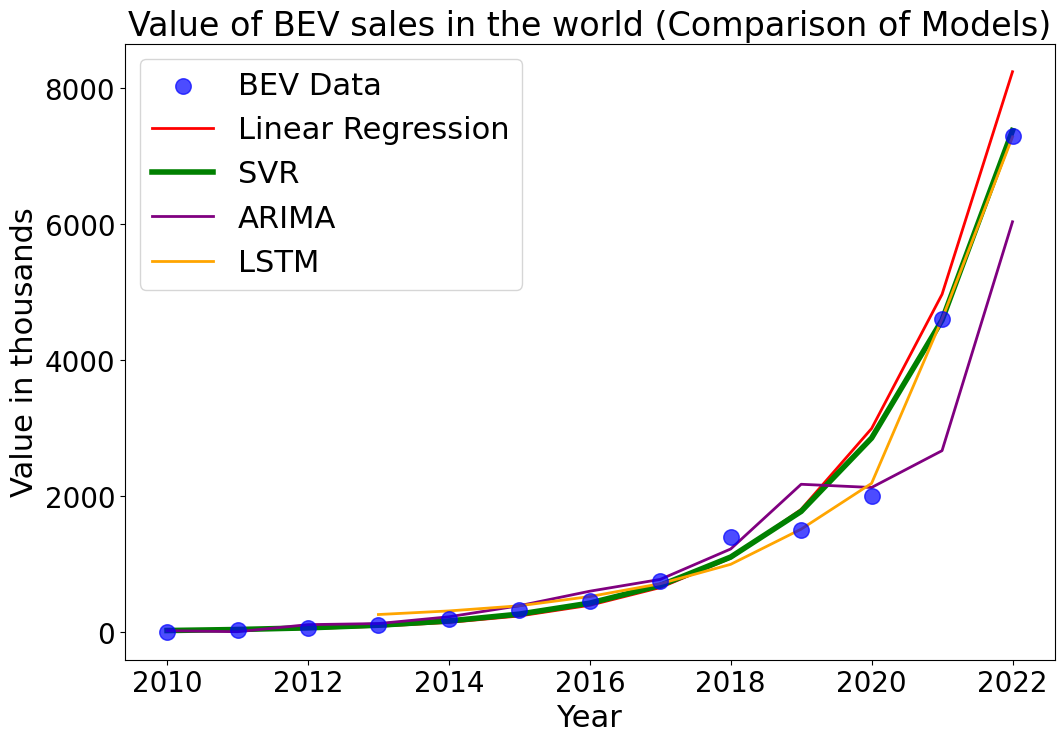

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping




# Load the dataset
df = pd.read_csv('EV_WORLD.csv')
df = df.drop(['category', 'parameter', 'mode', 'unit'], axis=1)

# Create separate datasets for PHEV and BEV
df_phev = df[df['powertrain'] == 'PHEV']
df_bev = df[df['powertrain'] == 'BEV']
df_bev = df_bev.drop(['region', 'powertrain'], axis=1)

# Transform the data
df_bev['log_value'] = df_bev['value'].apply(lambda x: np.log(x))

# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(df_bev[['year']], df_bev['log_value'])
linear_prediction = np.exp(linear_model.predict(df_bev[['year']]))

# Create and train the SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(df_bev[['year']], df_bev['log_value'])
svr_prediction = np.exp(svr_model.predict(df_bev[['year']]))

# Create and train the ARIMA model
arima_model = ARIMA(df_bev['log_value'], order=(2, 0, 1))
arima_model_fit = arima_model.fit()
arima_prediction = np.exp(arima_model_fit.predict(start=0, end=len(df_bev) - 1))

# Load the LSTM data
df_lstm = pd.read_csv("EV_WORLD.csv")
df_lstm = df_lstm[df_lstm['powertrain'] == 'BEV']
df_lstm = df_lstm.drop(['category', 'parameter', 'mode', 'unit', 'region', 'powertrain'], axis=1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_lstm[['value']])

# Prepare the data for LSTM
lookback = 3
X_lstm, y_lstm = [], []
for i in range(len(df_lstm) - lookback):
    X_lstm.append(scaled_data[i:i+lookback])
    y_lstm.append(scaled_data[i+lookback])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(lookback, 1), kernel_regularizer=l2(0.001)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_model.fit(X_lstm, y_lstm, epochs=300, batch_size=1, verbose=0)

# Make predictions using LSTM
y_lstm_pred = lstm_model.predict(X_lstm)
y_lstm_pred_inv = scaler.inverse_transform(y_lstm_pred)

# Plot the final transformed fitting of all models in one graph
plt.figure(figsize=(12, 8))
plt.scatter(df_bev['year'], df_bev['value'] / 1000, color='blue', marker='o', s=125, zorder=10, label='BEV Data', alpha=0.7)
plt.plot(df_bev['year'], linear_prediction / 1000, color='red', label='Linear Regression', linewidth=2)
plt.plot(df_bev['year'], svr_prediction / 1000, color='green', label='SVR', linewidth=4)
plt.plot(df_bev['year'], arima_prediction / 1000, color='purple', label='ARIMA', linewidth=2)
plt.plot(df_lstm['year'][lookback:], y_lstm_pred_inv[:, 0] / 1000, color='orange', label='LSTM', linewidth=2)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Value in thousands', fontsize=22)
plt.title('Value of BEV sales in the world (Comparison of Models)', fontsize=24)
plt.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [39]:
lstm= y_lstm_pred_inv

In [40]:
lstm

array([[ 260135.55],
       [ 312902.03],
       [ 388348.2 ],
       [ 524439.9 ],
       [ 712880.6 ],
       [ 998281.7 ],
       [1515639.2 ],
       [2189442.5 ],
       [4604273.5 ],
       [7284428.5 ]], dtype=float32)

In [16]:
lstm

array([ 260135.55,  312902.03,  388348.2 ,  524439.9 ,  712880.6 ,
        998281.7 , 1515639.2 , 2189442.5 , 4604273.5 , 7284428.5 ],
      dtype=float32)

In [18]:
tata=df_lstm['year'][lookback:]

Text(0.5, 0, 'Year')

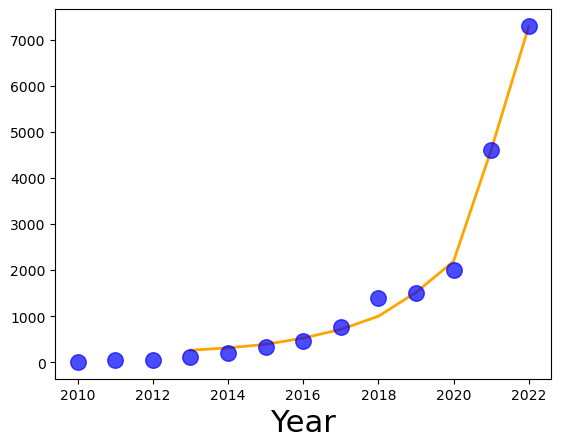

In [43]:
plt.scatter(df_bev['year'], df_bev['value'] / 1000, color='blue', marker='o', s=125, zorder=10, label='BEV Data', alpha=0.7)
plt.plot(tata,lstm/ 1000, color='orange', label='LSTM', linewidth=2)
plt.xlabel('Year', fontsize=22)

In [42]:
from sklearn.metrics import mean_squared_error

lstm = np.array([260135.55, 312902.03, 388348.2, 524439.9, 712880.6, 998281.7, 1515639.2, 2189442.5, 4604273.5, 7284428.5])
actual_values = df_bev['value'].values[-len(lstm):]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, lstm))
print('RMSE:', rmse)


RMSE: 155832.0169656459


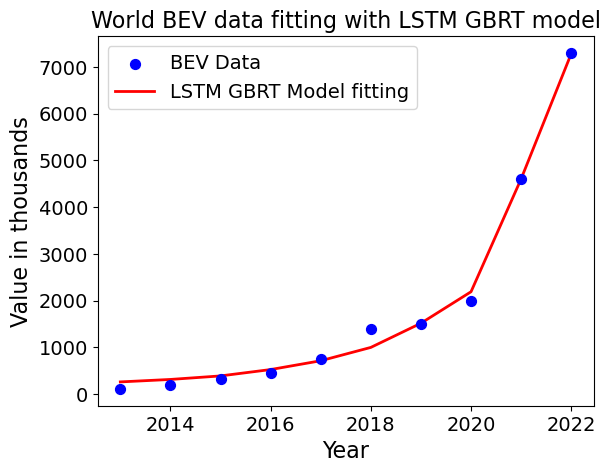

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df=pd.read_csv("EV_WORLD.csv")
df=df.drop(['category','parameter','mode','unit'], axis=1)
df.head(25)
# Create separate datasets for PHEV and BEV

df = df[df['powertrain'] == 'BEV']
df=df.drop(['region','powertrain'],axis=1)
df


lstm = np.array([260135.55, 312902.03, 388348.2, 524439.9, 712880.6, 998281.7, 1515639.2, 2189442.5, 4604273.5, 7284428.5])
actual_values = df['value'].values[-len(lstm):]
 


# Plot the actual and predicted values
plt.scatter(df['year'][3:], df['value'][3:]/1000,color='blue',marker='o', s=50, zorder=10,label='BEV Data')
plt.plot(df['year'][3:],lstm/ 1000,color='red',linewidth=2, label='LSTM GBRT Model fitting')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Value in thousands', fontsize=16)
plt.title('World BEV data fitting with LSTM GBRT model', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
#RMSE: 155832.0169656459